# Files necessay to run:

- `PhotoReceptorData.pkl` contains the data describing the photoisomerization rates of the photoreceptors
- `IlluminationDataMEA2.pkl` contains the data describing the illumination of the LEDs
- `cal_with_MEA2_matias.pkl` contains the data describing the (human) white LED and other parameters for voltages computation

In [2]:
# prevents warnings from being printed only in this cell
import warnings
warnings.filterwarnings("ignore")
import pickle

from matplotlib.pyplot import *
from scipy import interpolate

%pylab inline
warnings.filterwarnings("default")

from isomerization_lib import *

%load_ext autoreload
%autoreload 2

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


# Load Opsin data

In [3]:
fsave = './PhotoReceptorData'
PhData = load_obj(fsave)                        # Photo Receptors Data

Opsins=[]                                       # Opsins matrix initialization

Opsins.append(PhData['Scones'])                 # S cones
Opsins.append(PhData['Mela'])                   # Melanopsin
Opsins.append(PhData['Rods'])                   # Rods
Opsins.append(PhData['Mcones'])                 # M cones
Opsins.append(PhData['RedOpsin'])               # Red Opsin

x = PhData['x_axis']                            # Wavelength axis

# Creating a dictionary with indexes for each opsin
OpsinIndex = {'S-cone':0,'Melano':1,'Rhodo':2,'M-cone':3,'Redo':4}


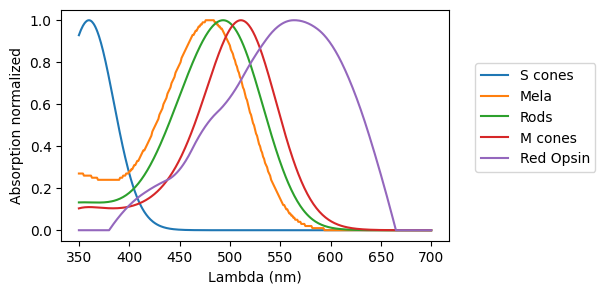

In [4]:
fig, ax = plt.subplots(figsize=(5, 3))

for o in Opsins:
    ax.plot(x,o)

ax.set_xlabel('Lambda (nm)')    
ax.set_ylabel('Absorption normalized')

# move legend out of the plot
ax.legend(['S cones','Mela','Rods','M cones','Red Opsin'], bbox_to_anchor=(1.05, 0.8))


# Load LEDs illumination Data

In [5]:
fsave = './IlluminationDataMEA2'
IData = load_obj(fsave)                                     # Illumination Data Load

LEDs =[]                                                    # LEDs matrix initialization                                
LEDs.append(IData['Violet'])                                # Violet        
LEDs.append(IData['Blue'])                                  # Blue
LEDs.append(IData['Green'])                                 # Green
LEDs.append(IData['Yellow'])                                # Yellow
LEDs.append(IData['Red'])                                   # Red

x = IData['x_axis']                                         # Wavelength axis

# Power meter correction factor from 09/09/22
correction_f = 1                                        

LEDs=np.array(LEDs)/correction_f                            # Correction

Text(0, 0.5, 'Power (µW/cm²)')

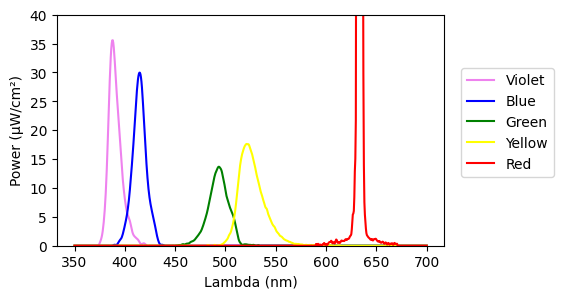

In [6]:
fig , ax = plt.subplots(figsize=(5, 3))

ax.plot(x,LEDs[0], 'violet')
ax.plot(x,LEDs[1], 'blue')
ax.plot(x,LEDs[2], 'green')
ax.plot(x,LEDs[3], 'yellow')
ax.plot(x,LEDs[4], 'red')

ax.legend(['Violet','Blue','Green','Yellow','Red'], bbox_to_anchor=(1.3, 0.8))

ax.set_ylim([0,40])
ax.set_xlabel('Lambda (nm)')
ax.set_ylabel('Power (µW/cm²)')


# Calculate Isomerizations

## Compute Isomerization for all opsins for all LEDs sources

In [7]:
print ('\n')
print ('-----------------------------')
print ('EFFECTS FROM VIOLET LED')

# Get effect from Violet
VIOLET_ISO_result = IlluminanceFactor(LEDs[0],Opsins,x)
print('Results are in: Isomerisations/s - For R* value look for Rhodopsin result\n')
Write_fancy(VIOLET_ISO_result,F=0)

# -----------------------------------------------------------------------------------------------

print ('\n')
print ('-----------------------------')
print ('EFFECTS FROM BLUE LED')

# Get effect from Blue
BLUE_ISO_result = IlluminanceFactor(LEDs[1],Opsins,x)
print('Results are in: Isomerisations/s - For R* value look for Rhodopsin result\n')
Write_fancy(BLUE_ISO_result,F=0)

# -----------------------------------------------------------------------------------------------

print ('\n')
print ('-----------------------------')
print ('EFFECTS FROM GREEN LED')

# Get effect from Green
GREEN_ISO_result = IlluminanceFactor(LEDs[2],Opsins,x)
print('Results are in: Isomerisations/s - For R* value look for Rhodopsin result\n')
Write_fancy(GREEN_ISO_result,F=0)

# -----------------------------------------------------------------------------------------------

print ('\n')
print ('-----------------------------')
print ('EFFECTS FROM YELLOW LED')

# Get effect from Yellow
YELLOW_ISO_result = IlluminanceFactor(LEDs[3],Opsins,x)
print('Results are in: Isomerisations/s - For R* value look for Rhodopsin result\n')
Write_fancy(YELLOW_ISO_result,F=0)

# -----------------------------------------------------------------------------------------------

print ('\n')
print ('-----------------------------')
print ('EFFECTS FROM RED LED')

# Get effect from RED
RED_ISO_result = IlluminanceFactor(LEDs[4],Opsins,x)
print('Results are in: Isomerisations/s - For R* value look for Rhodopsin result\n')
Write_fancy(RED_ISO_result,F=0)

print ('\n')




-----------------------------
EFFECTS FROM VIOLET LED
Results are in: Isomerisations/s - For R* value look for Rhodopsin result

Scones      :     926469
Melanopsin  :     499454
Rhodopsin   :     761849
Mcones      :     211537
Red_opsin   :     133091


-----------------------------
EFFECTS FROM BLUE LED
Results are in: Isomerisations/s - For R* value look for Rhodopsin result

Scones      :     207797
Melanopsin  :     772089
Rhodopsin   :    1325039
Mcones      :     282238
Red_opsin   :     348531


-----------------------------
EFFECTS FROM GREEN LED
Results are in: Isomerisations/s - For R* value look for Rhodopsin result

Scones      :         65
Melanopsin  :    1454706
Rhodopsin   :    3854789
Mcones      :    1377817
Red_opsin   :     941918


-----------------------------
EFFECTS FROM YELLOW LED
Results are in: Isomerisations/s - For R* value look for Rhodopsin result

Scones      :          3
Melanopsin  :    1217198
Rhodopsin   :    4458878
Mcones      :    2262678
Red_

In [8]:
# Get effect from All together

ISO_result = IlluminanceFactor(np.sum(LEDs[0:4],axis=0),Opsins,x)

print('Results are in: Isomerisations/s - For R* value look for Rhodopsin result\n')
Write_fancy(ISO_result,F=0)
print('')
Write_fancy(ISO_result,F='scientific')


Results are in: Isomerisations/s - For R* value look for Rhodopsin result

Scones      :    1134334
Melanopsin  :    3943447
Rhodopsin   :   10400555
Mcones      :    4134269
Red_opsin   :    3611956

Scones      : 1.13e+06
Melanopsin  : 3.94e+06
Rhodopsin   : 1.04e+07
Mcones      : 4.13e+06
Red_opsin   : 3.61e+06


In [9]:
OpsinIndex

{'S-cone': 0, 'Melano': 1, 'Rhodo': 2, 'M-cone': 3, 'Redo': 4}

## Repeat for (Human) White Light Illumination


25.000000000000007

<Figure size 640x480 with 0 Axes>

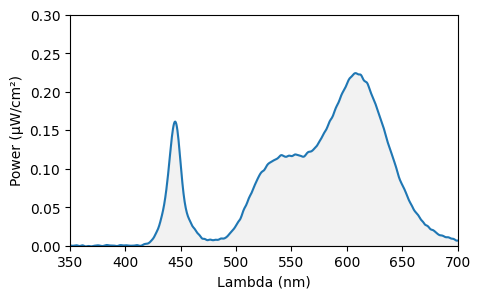

In [10]:
# Load LED data (for white in this case)
file_cal = 'cal_with_MEA2_matias.pkl'
caldata =load_obj(file_cal)

lx = caldata['xnew']
lx[0] = 300

color_order = caldata['orderS']
spec_curves = np.array(caldata['LedSpectra'])
spec_curves[:,0]=0


#--------------------------------------------------------------------------------
# White Spec for Vis Stim
figure()
WhiteVisPower = 25

WhiteVS = spec_curves[5]/np.sum(spec_curves[5])/diff(lx)[10]  * WhiteVisPower

f = interpolate.interp1d(lx,WhiteVS)
newWvis = f(x)/np.sum(f(x))*np.sum(WhiteVS)*diff(lx)[10]/diff(x)[0]

fig , ax = plt.subplots(figsize=(5, 3))

ax.plot(x,newWvis)
ax.fill_between(x,0,newWvis,alpha=0.1, color='grey')

ax.set_xlim([350,700])
ax.set_ylim([0,0.3])
ax.set_xlabel('Lambda (nm)')
ax.set_ylabel('Power (µW/cm²)')

np.sum(newWvis)*diff(x)[10]

In [11]:
# Get effect from White at Vis stim in 2p Setup

ISO_result = IlluminanceFactor(newWvis,Opsins,x)

print('Results are in: Isomerisations/s - For R* value look for Rhodopsin result\n')
Write_fancy(ISO_result,F=0)
print('')
Write_fancy(ISO_result,F='scientific')


Results are in: Isomerisations/s - For R* value look for Rhodopsin result

Scones      :         89
Melanopsin  :      22069
Rhodopsin   :      69974
Mcones      :      33646
Red_opsin   :     102293

Scones      : 8.85e+01
Melanopsin  : 2.21e+04
Rhodopsin   : 7.00e+04
Mcones      : 3.36e+04
Red_opsin   : 1.02e+05


In [12]:
# Get effect from White at OPTO full field

WhiteOptoPower = 71900/correction_f
ISO_result = IlluminanceFactor(newWvis/np.sum(newWvis)*WhiteOptoPower/diff(x)[10],Opsins,x)

print('Results are in: Isomerisations/s - For R* value look for Rhodopsin result\n')
Write_fancy(ISO_result,F=0)
print('')
Write_fancy(ISO_result,F='scientific')

print('')
# For Chrimson activation -> photons / cm2 / s -> *10^8 /ac  (=*5)
print('For photons / cm / s')
Write_fancy(ISO_result*10**8*5,F='scientific')

Results are in: Isomerisations/s - For R* value look for Rhodopsin result

Scones      :     254557
Melanopsin  :   63471241
Rhodopsin   :  201245534
Mcones      :   96767139
Red_opsin   :  294194753

Scones      : 2.55e+05
Melanopsin  : 6.35e+07
Rhodopsin   : 2.01e+08
Mcones      : 9.68e+07
Red_opsin   : 2.94e+08

For photons / cm / s
Scones      : 1.27e+14
Melanopsin  : 3.17e+16
Rhodopsin   : 1.01e+17
Mcones      : 4.84e+16
Red_opsin   : 1.47e+17


# Building (Mouse) White light illumination

## Computations

In [25]:
# Filippo
#----------------------------------------
violet = 1 * 0.3785
blue   = 0 
green = 0
yellow = 1 * 0.5585
red    = 0

# Filippo
#----------------------------------------
# violet = 0
# blue   = 1 * 0.035
# green = 1 * 0.148
# yellow = 1* 0.5585
# red    = 0

my_light = LEDs[0]*violet + LEDs[1]*blue + LEDs[2]*green + LEDs[3]*yellow + LEDs[4]*red


In [26]:
NDfilter = 0
Transmission =  10**(-NDfilter/10)

LIGHT = (violet*LEDs[0]+blue*LEDs[1]+green*LEDs[2]+yellow*LEDs[3]+red*LEDs[4])*Transmission

ISO_result = IlluminanceFactor(LIGHT,Opsins,x)

print('Results are in: Isomerisations/s - For R* value look for Rhodopsin result\n')
Write_fancy(ISO_result,F=0)

Results are in: Isomerisations/s - For R* value look for Rhodopsin result

Scones      :     350670
Melanopsin  :     868849
Rhodopsin   :    2778643
Mcones      :    1343772
Red_opsin   :    1272606


In [27]:
# Load LED data
file_cal = "cal_with_MEA2_matias.pkl"
caldata =load_obj(file_cal)
print(caldata.keys())

dict_keys(['V', 'Vcurves', 'xnew', 'LedSpectra', 'orderV', 'orderS', 'whiteP'])


In [28]:
caldata['orderV']

['r', 'y', 'g', 'b', 'violet']

In [29]:
lx = caldata['xnew']
lx[0] = 300

color_order = caldata['orderS']
spec_curves = np.array(caldata['LedSpectra'])
spec_curves[:,0]=0

reorder = [1,2,3,4,5]
Vcurves = np.array(caldata['Vcurves'])[:,reorder]

In [30]:
# New interpolated V calibration curves
#---------------------------------------------

Vnew = np.linspace(0,5,5001)
newVcurves = np.zeros([5,5001])
for i in np.arange(5):
    vals = (np. isnan(Vcurves[:,i]))==False
    f = interpolate.interp1d(caldata['V'][vals],Vcurves[:,i][vals],fill_value="extrapolate")
    newVcurves[i] = f(Vnew) / correction_f  # use interpolation function returned by `interp1d`
    newVcurves[i] = np.where(newVcurves[i]<0,0,newVcurves[i]) # take negative extrapolations out


Rmax = np.nanmax(newVcurves[0])
Ymax = np.nanmax(newVcurves[1])
Gmax = np.nanmax(newVcurves[2])
Bmax = np.nanmax(newVcurves[3])
Vmax = np.nanmax(newVcurves[4])

In [19]:
# 1/violet,1/green,Transmission
#Print voltages
print('\nVoltages')
print('redV   ',find_V(red,'r', newVcurves, Vnew),' V')
print('yellowV',find_V(yellow,'y', newVcurves, Vnew),' V')
print('greenV ',find_V(green,'g', newVcurves, Vnew),' V')
print('blueV  ',find_V(blue,'b', newVcurves, Vnew),' V')
print('violetV',find_V(violet,'v', newVcurves, Vnew),' V')



Voltages
redV    0.0  V
yellowV 5.0  V
greenV  0.0  V
blueV   0.0  V
violetV 5.0  V


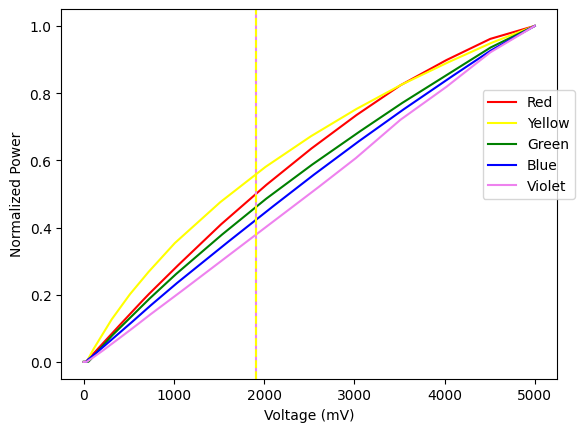

In [36]:
plot(newVcurves[0] / Rmax,color='red')
plot(newVcurves[1] / Ymax,color='yellow')
plot(newVcurves[2] / Gmax,color='green')
plot(newVcurves[3] / Bmax,color='blue')
plot(newVcurves[4] / Vmax,color='violet')
plt.legend(['Red','Yellow','Green','Blue','Violet'], bbox_to_anchor=(1.05, 0.8))
plt.xlabel('Voltage (mV)')
plt.ylabel('Normalized Power')

# TODO make this a function and in a for loop

if violet != 0:
    # plot vertical line at desired voltage
    axvline(x=find_V(violet,'v', newVcurves, Vnew)*1000,color='violet',linestyle='-')

if blue != 0:
    # plot vertical line at desired voltage
    axvline(x=find_V(blue,'b', newVcurves, Vnew)*1000,color='blue',linestyle='--')

if green != 0:
    # plot vertical line at desired voltage
    axvline(x=find_V(green,'g', newVcurves, Vnew)*1000,color='green',linestyle='--')

if yellow != 0:
    # plot vertical line at desired voltage
    axvline(x=find_V(yellow,'y', newVcurves, Vnew)*1000,color='yellow',linestyle='--')

if red != 0:
    # plot vertical line at desired voltage
    axvline(x=find_V(red,'r', newVcurves, Vnew)*1000,color='red',linestyle='--')
    